In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [ ]:
df = pd.read_csv("/content/drake_data.csv")
df.head()

,album,lyrics_title,lyrics_url,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-l...,[Verse]\nPut my feelings on ice\nAlways been a...,8.7K
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-d...,[Verse]\nHands are tied\nSomeone's in my ear f...,38.8K
2,Certified Lover Boy,Not Around Lyrics,https://genius.com/Drake-not-around-lyrics,"[Intro]\nYeah, we back\nWassup ladies?\nSwisha...",129.8K
3,Certified Lover Boy,In the Cut (Ft. Roddy Ricch) Lyrics,https://genius.com/Drake-in-the-cut-lyrics,"[Intro: Drake]\nAyy, yeah\nPipe this shit up a...",72.1K
4,Certified Lover Boy,Zodiac Sign (Ft. Jessie Reyez) Lyrics,https://genius.com/Drake-zodiac-sign-lyrics,[Verse 1: Drake]\nYou ask how many girls I bee...,54.8K


In [ ]:
lyrics_list = df['lyrics'].tolist()
lyrics_list[:3]

["[Verse]\nPut my feelings on ice\nAlways been a gem\nCertified lover boy, somehow still heartless\nHeart is only gettin' colder",
 "[Verse]\nHands are tied\nSomeone's in my ear from the other side\nTellin' me that I should pay you no mind\nWanted you to not be with me all night\nWanted you to not stay with me all night\nI know, you know, who that person is to me\nDoesn't really change things\n\n[Chorus]\nI know you're scared of dating, falling for me\nShorty, surely you know me\nRight here for you always\nYou know, I don't ever change\nRight here for you always\nYou know I don't ever change\nRight here for you\n\n[Bridge]\nIn mind you make me want to do things, love you\nLike I'm supposed to\nYou make me want to love you\nLike I'm supposed to\nYou make me want to love you\nLike I'm supposed to, remind you\nAyy\n\n[Chorus]\nI know you're scared of dating, falling for me\nShorty, by now you know me\nRight here for you always\nYou know, I don't ever change\nRight here for you always\nYou

In [ ]:
import re

cleaned_lyrics_list = []
for song_lyrics in lyrics_list:
    # Check if song_lyrics is a string
    if isinstance(song_lyrics, str):
        # remove square brackets and their contents
        no_brackets = re.sub(r'\[.*?\]', '', song_lyrics)
        # replace slashes with spaces
        no_slashes = re.sub(r'/', ' ', no_brackets)
        # split the cleaned lyrics into separate lines
        lines = no_slashes.split('\n')
        # remove any remaining empty lines
        lines = [line for line in lines if line.strip() != '']
        cleaned_lyrics_list.extend(lines)

cleaned_lyrics_list[:3]


['Put my feelings on ice',
 'Always been a gem',
 'Certified lover boy, somehow still heartless']

In [ ]:
len(cleaned_lyrics_list)

17580

In [ ]:
corp = cleaned_lyrics_list[:len(cleaned_lyrics_list)//4]

In [ ]:
# Convert to lowercase and save as a list
corpus = [line.lower() for line in corp]

print(f"There are {len(corpus)} lines of text\n")
print(f"The first 5 lines look like this:\n")
print(corpus[:20])

There are 4395 lines of text

The first 5 lines look like this:

['put my feelings on ice', 'always been a gem', 'certified lover boy, somehow still heartless', "heart is only gettin' colder", 'hands are tied', "someone's in my ear from the other side", "tellin' me that i should pay you no mind", 'wanted you to not be with me all night', 'wanted you to not stay with me all night', 'i know, you know, who that person is to me', "doesn't really change things", "i know you're scared of dating, falling for me", 'shorty, surely you know me', 'right here for you always', "you know, i don't ever change", 'right here for you always', "you know i don't ever change", 'right here for you', 'in mind you make me want to do things, love you', "like i'm supposed to"]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [ ]:
total_words

4064

In [ ]:
corpus[0]

'put my feelings on ice'

In [ ]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[124, 10, 621, 12, 365]

In [ ]:
def n_gram_seqs(corpus, tokenizer):
    """
    Generates a list of n-gram sequences

    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary

    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
    """
    input_sequences = []

    for line in corpus:
      token_list = tokenizer.texts_to_sequences([line])[0]
      for i in range(1, len(token_list)):
          n_gram_sequence = token_list[:i+1]
          input_sequences.append(n_gram_sequence)

    return input_sequences

In [ ]:
# Test the function with one example
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[124, 10], [124, 10, 621], [124, 10, 621, 12], [124, 10, 621, 12, 365]]

In [ ]:
# Test the function with a bigger corpus
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[105, 79],
 [105, 79, 7],
 [105, 79, 7, 1923],
 [1288, 622],
 [1288, 622, 120],
 [1288, 622, 120, 978],
 [1288, 622, 120, 978, 82],
 [1288, 622, 120, 978, 82, 1924],
 [210, 19],
 [210, 19, 115],
 [210, 19, 115, 211],
 [210, 19, 115, 211, 1925]]

In [ ]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 31828
maximum length of sequences is: 131


In [ ]:
def pad_seqs(input_sequences, maxlen):
    """
    Pads tokenized sequences to the same length

    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences

    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """
    padded_sequences = pad_sequences(input_sequences, maxlen=maxlen, padding='pre')

    return padded_sequences

In [ ]:
# Test the function with the n_grams_seq of the first example
first_padded_seq = pad_seqs(first_example_sequence, max([len(x) for x in first_example_sequence]))
first_padded_seq

array([[  0,   0,   0, 124,  10],
       [  0,   0, 124,  10, 621],
       [  0, 124,  10, 621,  12],
       [124,  10, 621,  12, 365]], dtype=int32)

In [ ]:
# Test the function with the n_grams_seq of the next 3 examples
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))
next_3_padded_seq

array([[   0,    0,    0,    0,  105,   79],
       [   0,    0,    0,  105,   79,    7],
       [   0,    0,  105,   79,    7, 1923],
       [   0,    0,    0,    0, 1288,  622],
       [   0,    0,    0, 1288,  622,  120],
       [   0,    0, 1288,  622,  120,  978],
       [   0, 1288,  622,  120,  978,   82],
       [1288,  622,  120,  978,   82, 1924],
       [   0,    0,    0,    0,  210,   19],
       [   0,    0,    0,  210,   19,  115],
       [   0,    0,  210,   19,  115,  211],
       [   0,  210,   19,  115,  211, 1925]], dtype=int32)

In [ ]:
# Pad the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (31828, 131)


In [ ]:
def features_and_labels(input_sequences, total_words):
    """
    Generates features and labels from n-grams

    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size

    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
    """
    input_sequences = np.array(input_sequences)
    features, labels = input_sequences[:,:-1], input_sequences[:,-1]
    one_hot_labels = to_categorical(labels, num_classes=total_words)

    return features, one_hot_labels

In [ ]:
# Test the function with the padded n_grams_seq of the first example
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (4, 4064)

features look like this:



array([[  0,   0,   0, 124],
       [  0,   0, 124,  10],
       [  0, 124,  10, 621],
       [124,  10, 621,  12]], dtype=int32)

In [ ]:
# Split the whole corpus
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (31828, 130)
labels have shape: (31828, 4064)


In [ ]:
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model

    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences

    Returns:
        model (tf.keras Model): the text generator model
    """
    model = Sequential()

    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150, return_sequences=False)))
    model.add(Dense(total_words, activation='softmax'))


    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


    return model

In [ ]:
# Get the untrained model
model = create_model(total_words, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=20, verbose=1)

Epoch 1/20
995/995 [==============================] - 473s 470ms/step - loss: 6.3899 - accuracy: 0.0367
Epoch 2/20
995/995 [==============================] - 463s 465ms/step - loss: 5.7299 - accuracy: 0.0700
Epoch 3/20
995/995 [==============================] - 464s 466ms/step - loss: 5.2054 - accuracy: 0.1129
Epoch 4/20
995/995 [==============================] - 465s 467ms/step - loss: 4.7358 - accuracy: 0.1590
Epoch 5/20
995/995 [==============================] - 462s 464ms/step - loss: 4.3239 - accuracy: 0.2008
Epoch 6/20
995/995 [==============================] - 459s 461ms/step - loss: 3.9478 - accuracy: 0.2419
Epoch 7/20
995/995 [==============================] - 464s 466ms/step - loss: 3.6070 - accuracy: 0.2895
Epoch 8/20
995/995 [==============================] - 462s 465ms/step - loss: 3.2918 - accuracy: 0.3369
Epoch 9/20
995/995 [==============================] - 463s 465ms/step - loss: 2.9989 - accuracy: 0.3848
Epoch 10/20
995/995 [==============================] - 468s 471m

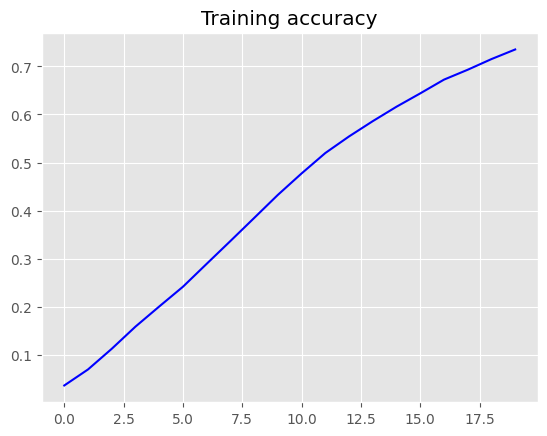

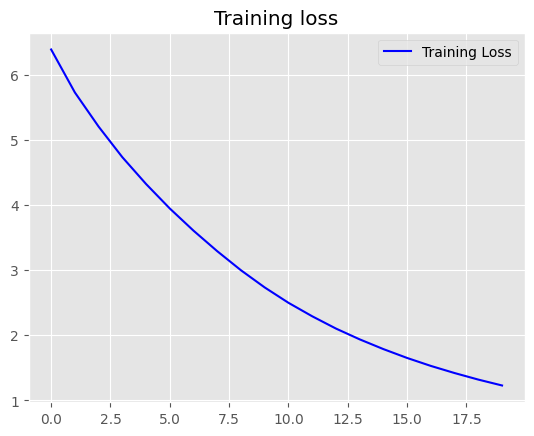

In [ ]:
# Take a look at the training curves of the model

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Dear Bob, i want to tell you something"
next_words = 500

for _ in range(next_words):
    # Convert the text into sequences
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Get the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    # Choose the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Get the actual word from the word index
    output_word = tokenizer.index_word[predicted]
    # Append to the current text
    seed_text += " " + output_word

print(seed_text)

Dear Bob, i want to tell you something things but i'm not a liar but to still right there and you ain't know nobody else yeah now they been uh yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah man we said man what's next they crazy just me like me i’m hard right now i’m gone but i'm a wasteman but you're not a real nigga interlude a 100 woman and use a fucking condom as we in the most selective most seductive most relaxing four hours of the 93 7 it’s al wood and you are safe soft and warm in the loving embrace of my storm with the loving embrace of my storm with the loving embrace of my storm on my storm blk blk storm on my storm on blk blk blk storm on blk blk storm on storm storm blk storm blk storm on my storm blk storm in your storm with troop blk blk blk blk storm up storm through your storm with troop blk storm with the loving seductive the most selective most seductive most seductive most relaxing the most selective most of the 93 7 we in storm in b